In [34]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import os
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
import tensorflow.keras.utils as utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# 1. 데이터 셋 
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:,:-1].values
iris_Y = iris.iloc[:,-1]
# 원핫인코딩
# 숫자가아니라 문자가 인자인 경우 원핫인코딩 방법이 다르다
iris_Y = pd.get_dummies(iris_Y).values
X_train,X_test,Y_train,Y_test = train_test_split(iris_X,iris_Y,test_size=0.3,random_state=1)

In [8]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [15]:
#2. 모델 구성
model = Sequential()
model.add(Dense(units=64,input_dim=4,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

#3. 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#4. 학습
hist = model.fit(X_train,Y_train,epochs=80,batch_size=50,validation_split=0.2,verbose=2)

Epoch 1/80
2/2 - 1s - loss: 1.1308 - accuracy: 0.3929 - val_loss: 1.0244 - val_accuracy: 0.5238
Epoch 2/80
2/2 - 0s - loss: 0.9325 - accuracy: 0.7381 - val_loss: 0.9708 - val_accuracy: 0.5238
Epoch 3/80
2/2 - 0s - loss: 0.8229 - accuracy: 0.7381 - val_loss: 0.8798 - val_accuracy: 0.5238
Epoch 4/80
2/2 - 0s - loss: 0.7251 - accuracy: 0.7381 - val_loss: 0.7897 - val_accuracy: 0.5238
Epoch 5/80
2/2 - 0s - loss: 0.6371 - accuracy: 0.7381 - val_loss: 0.7271 - val_accuracy: 0.5238
Epoch 6/80
2/2 - 0s - loss: 0.5689 - accuracy: 0.7381 - val_loss: 0.6755 - val_accuracy: 0.5238
Epoch 7/80
2/2 - 0s - loss: 0.5017 - accuracy: 0.7381 - val_loss: 0.6572 - val_accuracy: 0.5238
Epoch 8/80
2/2 - 0s - loss: 0.4512 - accuracy: 0.7381 - val_loss: 0.5920 - val_accuracy: 0.5714
Epoch 9/80
2/2 - 0s - loss: 0.4016 - accuracy: 0.8095 - val_loss: 0.4858 - val_accuracy: 0.9048
Epoch 10/80
2/2 - 0s - loss: 0.3468 - accuracy: 0.9762 - val_loss: 0.4425 - val_accuracy: 0.8571
Epoch 11/80
2/2 - 0s - loss: 0.3071 - a

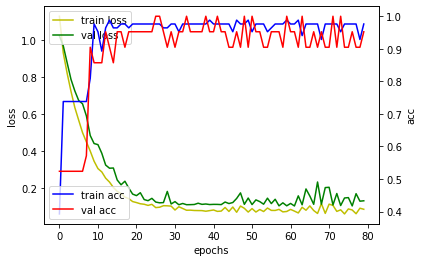

In [16]:
# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축 공유 하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [27]:
# 6. 평가
score = model.evaluate(X_test,Y_test,batch_size=50)
print('평가된 loss : ',score[0])
print('평가된 accuracy : ',score[1])

1/1 [==============================] - 0s 13ms/step - loss: 0.0815 - accuracy: 0.9778
평가된 loss :  0.0815189853310585
평가된 accuracy :  0.9777777791023254


In [30]:
# 7. 예측
real = np.argmax(Y_test,axis=1)
pred = np.argmax(model.predict(X_test),axis=1)
ct = pd.crosstab(real,pred)
ct.index.name='real'
ct.columns.name='pred'
ct

pred,0,1,2
real,,,
0,14,0,0
1,0,17,1
2,0,0,13


Epoch 1/80
2/2 - 1s - loss: 1.1506 - accuracy: 0.5595 - val_loss: 0.9962 - val_accuracy: 0.3810

Epoch 00001: val_accuracy improved from -inf to 0.38095, saving model to ./model\iris-001-val0.3810.h5
Epoch 2/80
2/2 - 0s - loss: 0.8986 - accuracy: 0.5476 - val_loss: 0.9171 - val_accuracy: 0.5238

Epoch 00002: val_accuracy improved from 0.38095 to 0.52381, saving model to ./model\iris-002-val0.5238.h5
Epoch 3/80
2/2 - 0s - loss: 0.7530 - accuracy: 0.7381 - val_loss: 0.8247 - val_accuracy: 0.5238

Epoch 00003: val_accuracy did not improve from 0.52381
Epoch 4/80
2/2 - 0s - loss: 0.6323 - accuracy: 0.7381 - val_loss: 0.7256 - val_accuracy: 0.5238

Epoch 00004: val_accuracy did not improve from 0.52381
Epoch 5/80
2/2 - 0s - loss: 0.5315 - accuracy: 0.7381 - val_loss: 0.6418 - val_accuracy: 0.5238

Epoch 00005: val_accuracy did not improve from 0.52381
Epoch 6/80
2/2 - 0s - loss: 0.4556 - accuracy: 0.7381 - val_loss: 0.6138 - val_accuracy: 0.5238

Epoch 00006: val_accuracy did not improve fr


Epoch 00052: val_accuracy did not improve from 1.00000
Epoch 53/80
2/2 - 0s - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.1132 - val_accuracy: 1.0000

Epoch 00053: val_accuracy did not improve from 1.00000
Epoch 54/80
2/2 - 0s - loss: 0.0858 - accuracy: 0.9762 - val_loss: 0.1171 - val_accuracy: 0.9048

Epoch 00054: val_accuracy did not improve from 1.00000
Epoch 55/80
2/2 - 0s - loss: 0.0764 - accuracy: 0.9762 - val_loss: 0.1194 - val_accuracy: 0.9524

Epoch 00055: val_accuracy did not improve from 1.00000
Epoch 56/80
2/2 - 0s - loss: 0.0922 - accuracy: 0.9762 - val_loss: 0.1196 - val_accuracy: 0.9524

Epoch 00056: val_accuracy did not improve from 1.00000
Epoch 57/80
2/2 - 0s - loss: 0.0746 - accuracy: 0.9762 - val_loss: 0.1364 - val_accuracy: 0.9048

Epoch 00057: val_accuracy did not improve from 1.00000
Epoch 58/80
2/2 - 0s - loss: 0.0894 - accuracy: 0.9643 - val_loss: 0.1255 - val_accuracy: 0.9048

Epoch 00058: val_accuracy did not improve from 1.00000
Epoch 59/80
2/2 - 0s - los

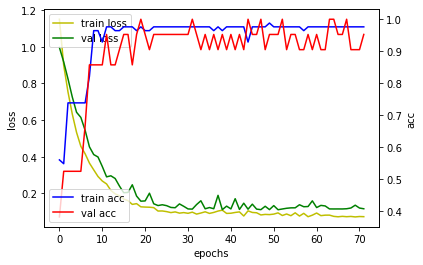

In [36]:
# 매 epochs마다 저장하기 
model_save_f = './model/'
if not os.path.exists(model_save_f):
    os.mkdir(model_save_f)
file = model_save_f+'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'
early_stop = EarlyStopping(patience=20)
cp = ModelCheckpoint(filepath=file,monitor='val_accuracy',verbose=1,save_best_only=True)


# 1. 데이터 셋 
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:,:-1].values
iris_Y = iris.iloc[:,-1]
# 원핫인코딩
# 숫자가아니라 문자가 인자인 경우 원핫인코딩 방법이 다르다
iris_Y = pd.get_dummies(iris_Y).values
X_train,X_test,Y_train,Y_test = train_test_split(iris_X,iris_Y,test_size=0.3,random_state=1)
#2. 모델 구성
model = Sequential()
model.add(Dense(units=64,input_dim=4,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

#3. 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#4. 학습
hist = model.fit(X_train,Y_train,epochs=80,batch_size=50,validation_split=0.2,verbose=2
                ,callbacks=[early_stop,cp])

# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축 공유 하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()